# Pawpularity Contest

<img src="notebook-images/header.jpeg">

## Overview

A picture is worth a thousand words. But did you know a picture can save a thousand lives? Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. You might expect pets with attractive photos to generate more interest and be adopted faster. But what makes a good picture? With the help of data science, we may be able to accurately determine a pet photo’s appeal and even suggest improvements to give these rescue animals a higher chance of loving homes.

## Business Understanding

<a href="https://www.petfinder.my/">PetFinder.my</a> is Malaysia’s leading animal welfare platform, featuring over 180,000 animals with 54,000 happily adopted. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.

Currently, PetFinder.my uses a basic Cuteness Meter to rank pet photos. It analyzes picture composition and other factors compared to the performance of thousands of pet profiles. While this basic tool is helpful, it's still in an experimental stage and the algorithm could be improved. In this notebook, we attempt to create an entirely new tool that PetFinder can use to predict the "pawpularity" of an animal profile, based on the profile image. As a result, stray dogs and cats can find their "furever" homes much faster. 

## Technical Understanding

## Data Understanding

For this project, we have historical data from the PetFinder.my website composed of almost 10,000 images and hand-labeled metadata per image. We'll begin by investigating the metadata data set, then move on to the corresponding images data set. 

### Metadata Dataset

In this section, we will put the Metadata under the microscope, seraching for trends between its features and our target. 

In [30]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set optional module display options
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [31]:
# load data into DataFrame object
df = pd.read_csv('data/train.csv')

# preview DataFrame
df.head(5)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [32]:
# get info per feature in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


Our dataset consists of 13 features and 1 target. For the sake of clarity, we will enumerate each feature and what it represents:
<ol>
    <u>Feature Columns</u>
    <li><b>Id</b> - the .jpg file name of the associated image located in the data/train folder.</li>
    <li><b>Subject Focus</b> - Pet stands out against uncluttered background, not too close / far.</li>
    <li><b>Eyes</b> - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.</li>
    <li><b>Face</b> - Decently clear face, facing front or near-front.</li>
    <li><b>Near</b> - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).</li>
    <li><b>Action</b> - Pet in the middle of an action (e.g., jumping).</li>
    <li><b>Accessory</b> - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.</li>
    <li><b>Group</b> - More than 1 pet in the photo.</li>
    <li><b>Collage</b> - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).</li>
    <li><b>Human</b> - Human in the photo.</li>
    <li><b>Occlusion</b></b> - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered undesirable.</li>
    <li><b>Info</b> - Custom-added text or labels (i.e. pet name, description).</li>
    <li><b>Blur</b> - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.</li>
</ol>

Note also, that all of our features are one-hot style. 

<ol><u>Target Column</u>
    <li><b>Pawpularity</b> - The Pawpularity Score is derived from each pet profile's page view statistics at the listing pages, using an algorithm that normalizes the traffic data across different pages, platforms (web & mobile) and various metrics. Duplicate clicks, crawler bot accesses and sponsored profiles are excluded from the analysis. </li>
</ol>

Note that our target is an integer between 0 and 100. 

Additionally, it appears that we are not missing any values, which is always a huge win! Let's take a look at the properties of the columns.

In [33]:
# break df into data and target
data = df.drop(['Pawpularity'], axis=1)
target = df['Pawpularity']

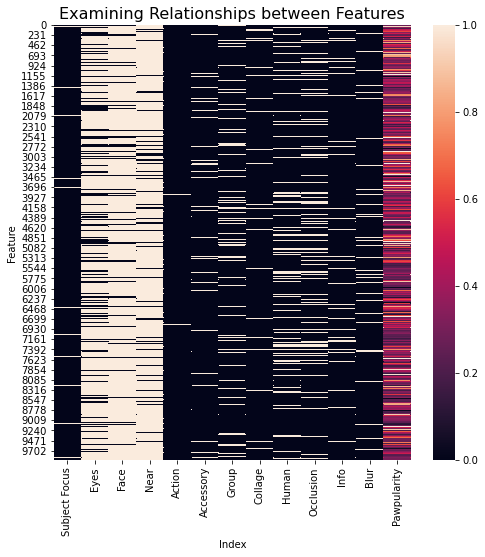

In [34]:
# plot heatmap of data per index for relationship insights
plt.figure(figsize=(8,8))
sns.heatmap(pd.concat([data.drop('Id', axis=1), target/100], axis=1));
plt.title('Examining Relationships between Features', fontsize=16);
plt.xlabel('Index');
plt.ylabel('Feature');
plt.show();

There are no visually discernible patterns between feature expressions/combinations and target values. 

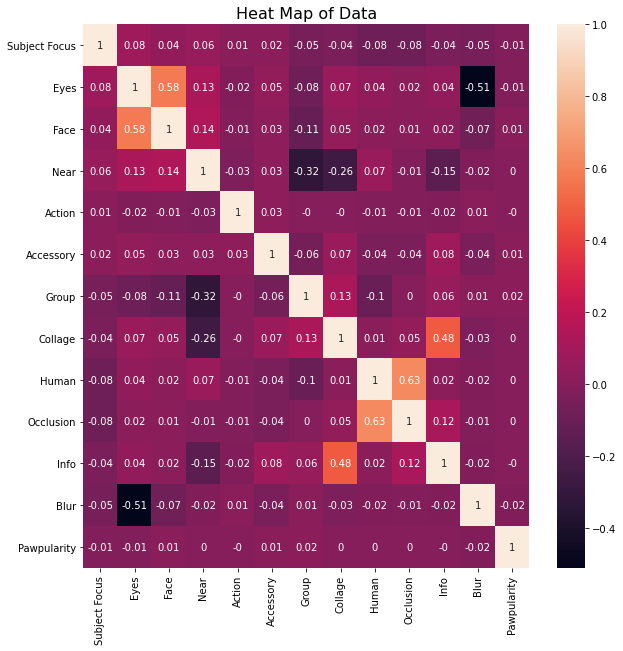

In [35]:
# plot heatmap of data
plt.figure(figsize=(10,10))
sns.heatmap(round(df.corr(), 2), annot=True);
plt.title('Heat Map of Data', fontsize=16);

It also looks as though multicollinearity will not be a huge issue with our data. But if we do run into model complexity / overfitting due to high variance issues further down the line, we should remember the few feature correlations that stand apart from the rest for tuning purposes:

- Face and Eyes
- Human and Occlusion
- Collage and Info
- Blur and Eyes

Since the Eyes-feature is highly correlated with two other features, we might consider dropping it as opposed to dropping the Face- and Blur-features. But it would be beneficial to test all the different cases at our disposal for insurance purposes.

Also, the feature correlations with our target variable are devestatingly low, thus we might expect this process to be a bit more tedious / better estimated by a complex model. 

In [36]:
# check sparsity of feature columns
data.drop('Id', axis=1).mean()

Subject Focus    0.027643
Eyes             0.772599
Face             0.903955
Near             0.861582
Action           0.009988
Accessory        0.067797
Group            0.129338
Collage          0.049637
Human            0.166263
Occlusion        0.172014
Info             0.061239
Blur             0.070420
dtype: float64

Looking at the means of each feature, we can tell that there some of the features are severely sparsely populated while others are very densely populated. None are relatively evenly populated. 

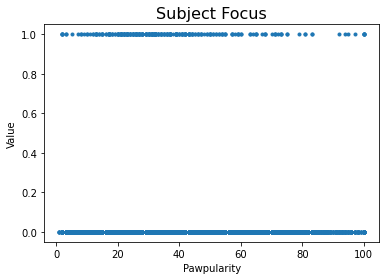

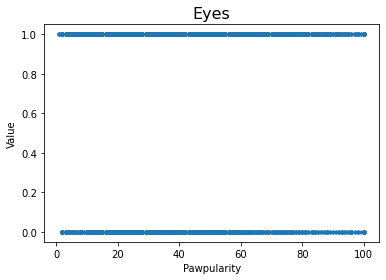

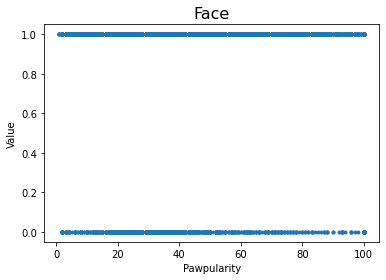

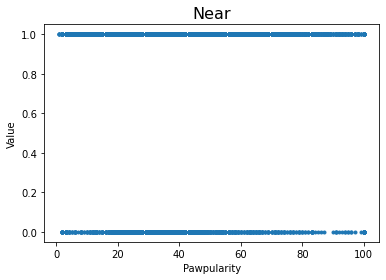

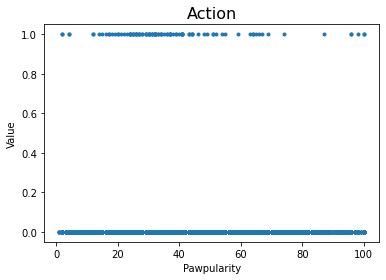

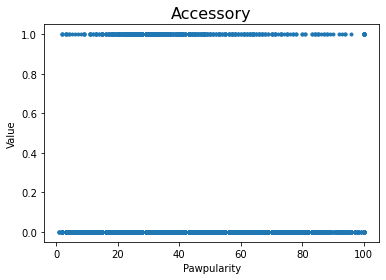

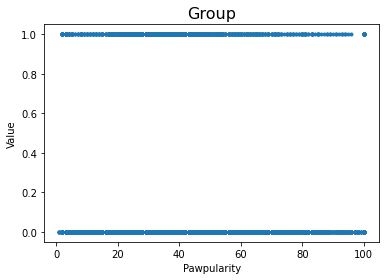

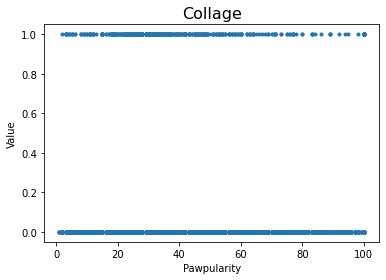

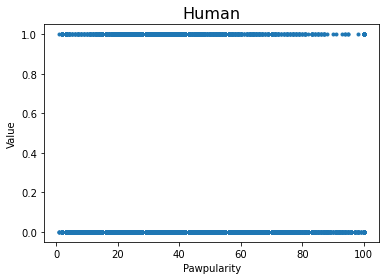

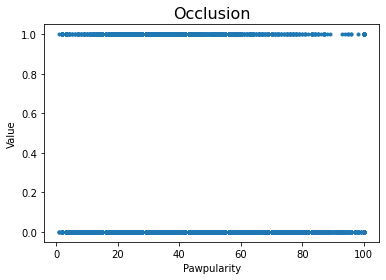

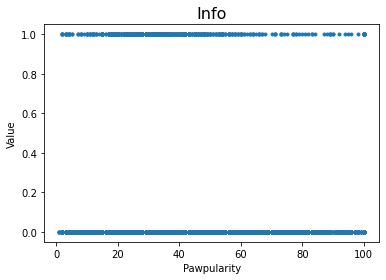

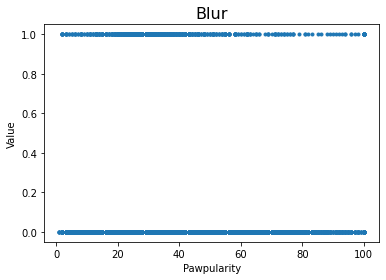

In [37]:
# plot feature vs. target distributions
for col in data.drop('Id', axis=1).columns:
    plt.figure()
    plt.title(str(col), fontsize=16)
    plt.xlabel('Pawpularity')
    plt.ylabel('Value')
    plt.plot(target, data[col], '.')

As we might have expected from the heat map, the plots do not indicate that there exists a strong relationship between the value of any given feature and the target pawpularity score. 

Let's take a look at the target variable, pawpularity score. 

In [38]:
# check descriptive statistics of target
target.describe()

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

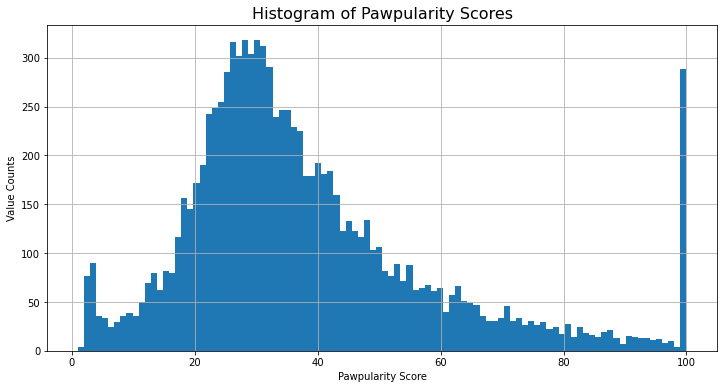

In [39]:
# plot histogram of target data
plt.figure(figsize=(12,6));
target.hist(bins=100);
plt.title('Histogram of Pawpularity Scores', fontsize=16);
plt.xlabel('Pawpularity Score');
plt.ylabel('Value Counts');

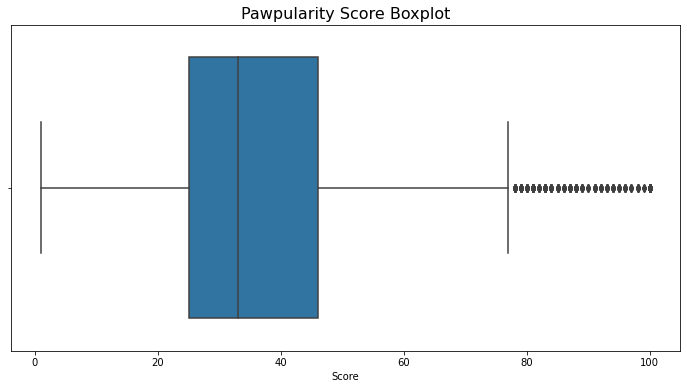

In [11]:
# plot boxplot of target data
plt.figure(figsize=(12,6));
sns.boxplot(target);
plt.title('Pawpularity Score Boxplot', fontsize=16);
plt.xlabel('Score');

It appears as though we are dealing with a relatively normally distributed target variable, which is always great news. Since the distribution is skewed right, we might consider applying a square root or log transform in order to achieve a higher degree of normality. As we might have expected from the heavy right-tail of histogram, our target data contains several outlier values in the range of higher values. It might benefit us to take a look at the outlier distribution as well. If time permits, there could be value in exploring a calssifier model that can predict where the sample is an outlier. In the meantime, let's take a look at our outlier-valued samples. 

The stop value of the upper quartile is: 77.5


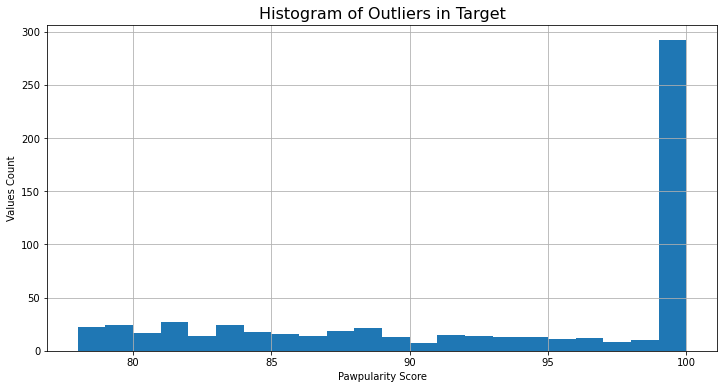

Value Counts Per Pawpularity Score:
- - - - - - - - - - - - - - - - - -
78      22
79      24
80      17
81      27
82      14
83      24
84      18
85      16
86      14
87      19
88      21
89      13
90       7
91      15
92      14
93      13
94      13
95      11
96      12
97       8
98      10
99       4
100    288
Name: Pawpularity, dtype: int64

Total Number of Outliers: 624


In [12]:
# find interquartile range
q1 = target.quantile(.25)
q3 = target.quantile(.75)
iqr = q3 - q1

# compute high stop-value; we don't need to worry about the low stop-value 
# because, according to our boxplot, there are no low-valued outliers
stop_high = q3 + 1.5*iqr
print('The stop value of the upper quartile is: ' + str(stop_high))

# get distribution of outliers in our dataset
plt.figure(figsize=(12,6));
target[target > stop_high].hist(bins=22);
plt.title('Histogram of Outliers in Target', fontsize=16);
plt.xlabel('Pawpularity Score');
plt.ylabel('Values Count');
plt.show();

# print out pawpularity score value counts for each outlier score
print('Value Counts Per Pawpularity Score:')
print('- - - - - - - - - - - - - - - - - -')
print(target[target > stop_high].value_counts().sort_index())
print()

# print out total number of outliers
num_outliers = target[target > stop_high].value_counts().sum()
print('Total Number of Outliers: ' + str(num_outliers))

Our outliers are uniformly distributed, except for at 100, where we have 288 values. Again, we might take a closer look at how we incorporate our ouliers in training later on in the modeling process if we don't achieve the level of performance that we are aiming for. But because there are so many 100-valued samples (as well as others, appx. 6% of our dataset), we cannot simply disregard them; again, it might be worth it to revisit the concept of creating a classification model designed to detect outliers, or 100-valued targets. 

### Metadata Classification Datasets

We might be interested in trying to approach this from a classification angle. There's the chance that a classification model would do better than a regression model - the only way to know is to find out. We will explore this approach by creating datasets that delineate classes in various increments of Pawpularity. This will be more clear in the code to follow. 

In [13]:
# function that makes n_classes number of evenly splitted classes for a given
#    continuous variable; in this case, for the target variable 'Pawpularity'
def make_classes(df, n_classes, target_col='Pawpularity', agg_func=None):
    
    # make copy of df
    df = df.copy()
    
    # initialize lists
    bins = []
    labels = []
    
    # add smallest lower-bound value to bins list
    bins.append(df[target_col].min() - 1)
    
    # add bin increments to bins list
    for i in range(1, n_classes):
        
        q = round(i / n_classes, 2)
        bins.append(df[target_col].quantile(q))
        
    # add largest upper-bound value to bins list
    bins.append(df[target_col].max() + 1)
    
    # divide df into roughly equally sized slices, calculate mean for output label
    # NOTE: we use the mean to calculate the output labels list because we are optimizing our
    #       model for RMSE score
    for i in range(len(bins) - 1):
        
        df_slice = (df[(df[target_col] >= bins[i]) & 
                       (df[target_col] < bins[i+1])])
        
        slice_median = round(df_slice[target_col].median(), 0)
        labels.append(slice_median)
        
    # redefine target variable column, transforming continuous to class variable
    df[target_col] = pd.cut(df[target_col],
                            bins=bins,
                            labels=labels)
    
    # print classes and value counts, just fyi
    print('Value counts of new classes: ')
    print(df[target_col].value_counts().sort_index())
    
    return df

In [14]:
df_clf = df.copy()

In [15]:
df_2class = make_classes(df_clf, 2)

Value counts of new classes: 
25.0    5038
46.0    4874
Name: Pawpularity, dtype: int64


In [16]:
df_3class = make_classes(df_clf, 3)

Value counts of new classes: 
22.0    3574
33.0    3143
55.0    3195
Name: Pawpularity, dtype: int64


In [17]:
df_4class = make_classes(df_clf, 4)

Value counts of new classes: 
19.0    2638
29.0    2400
38.0    2401
60.0    2473
Name: Pawpularity, dtype: int64


In [18]:
df_5class = make_classes(df_clf, 5)

Value counts of new classes: 
17.0    2098
26.0    2098
33.0    1790
42.0    1995
66.0    1931
Name: Pawpularity, dtype: int64


For now, we will consider these new DataFrames sufficient. We decided to constuct our make_classes function in such a way to produce evenly balanced classes, but there are several other considerations to be had with respect to the classes to be produced: what if we used a different aggregation function to specify our bins? What if we evenly spaced our class labels (i.e. 25, 50, 75 for a 3-class df)? If necessary and time permits, we can revisit our strategy here to see if there is a better fit. 

### Images Dataset

We will now take a close look at the accompanying images dataset. 

In [13]:
# import necessary modules
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In [14]:
# load images into workspace drom directory
train_generator = ImageDataGenerator().flow_from_directory(directory='data/',
                                                           shuffle=False,        # load images in alphanumerical order
                                                           target_size=(224,224), 
                                                           classes=['train'],
                                                           batch_size=9912)

# save images as RGB arrays
X_img = train_generator[0][0]

Found 9912 images belonging to 1 classes.


In [15]:
# check dataset shape
X_img.shape

(9912, 224, 224, 3)

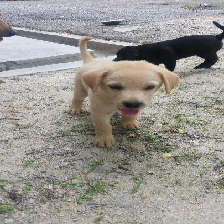

In [16]:
# preview first image
array_to_img(X_img[0])

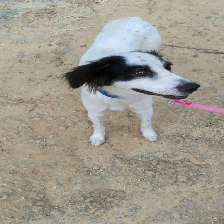

In [17]:
# preview last image
array_to_img(X_img[9911])

Great, so it looks as though everything is working properly. It should be noted that the order of the images is the same as the order of the Id column of the meta-data dataset. This means that we do not have to reorganize our target column to match the images dataset. If we use keras, tensorflow, pytorch, or another neural nets library, we likely do not need to restructure our images until we actually implement the ANN. 

The last thing we might want to do is physically inpect our images vs. scores, to get an intuitive feel for the aspects of images that help the score of that image. Instead of doing this manually in the notebook, we have elected to save the full dataframe with corresponding images per row in an .html file, which may be accessed by forking/cloning this notebook, and running the following code on your own machine. The justification for this is to save space in the notebook. 

In [130]:
from IPython.core.display import HTML

In [131]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

def convert_to_path(name):
    path = 'data/train/' + str(name) + '.jpg'
    return path

In [149]:
df_html = df.copy()

df_html['image'] = df_html['Id'].map(lambda x: convert_to_path(x))

df_html.to_html('df_html.html', 
                escape=False, 
                formatters=dict(image=path_to_image_html))

In [153]:
# HTML(df_html.to_html(escape=False, formatters=dict(image=path_to_image_html)))

### Datasets Summary

Great! We have now cleaned and prepared several datasets, which is arguably the most important task in all of the machine learning process. Let's take a quick inventory, so that we know what data we have available to us going forward.

<b>Datasets</b>
<ul>
    <u>Metadata Datasets</u>
    <li><b>data</b> - regression dataset consisting of our raw data</li>
    <li><b>df_2class</b> - classification dataset consisting of 2 class output. Target included in DataFrame.</li>
    <li><b>df_3class</b> - classification dataset consisting of 3 class output. Target included in DataFrame.</li>
    <li><b>df_4class</b> - classification dataset consisting of 4 class output. Target included in DataFrame.</li>
    <li><b>df_5class</b> - classification dataset consisting of 5 class output. Target included in DataFrame.</li>
    <u>Image Datasets</u>
    <li><b>X_img</b> - dataset consisting of the images, with each image in structured array format. can be explored using to_image function.</li>

Note that it might be convenient to mix and match some of these datasets - we'll have to test it out to see what approach works best. We might as well save the various data into our datasets folder for housekeeping, portability, and backup purposes. 

In [55]:
# uncomment the code below if you wish to save the newly created data to file

# df.to_csv('datasets/og_df.csv', index=False)
# df_2class.to_csv('datasets/2class_df.csv', index=False)
# df_3class.to_csv('datasets/3class_df.csv', index=False)
# df_4class.to_csv('datasets/4class_df.csv', index=False)
# df_5class.to_csv('datasets/5class_df.csv', index=False)
# np.save('datasets/images_array.npy', X_img)


Nice! We can now move on to the modeling process. 

## MODELING

## Regression Modeling with Metadata

We will begin our modeling process by first establishing a baseline to go off. Then, we will iterate and optimize several different models on strictly the metadata. After we are confident that we have totally exhausted the metadata, we will move on to modeling using ANNs on the image data. 

Because this is a regression project, we have decided on using RMSE as our performance metric. Based on performance of other individuals and teams competing, we have set our goal at an RMSE of 18. 

In [40]:
# import preliminary items
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

In [41]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Id', axis=1), 
                                                    target,
                                                    random_state=42)

In [31]:
# method for quickly testing simple models
def fit_score_plot(model, model_name, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    p_train = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, p_train, squared=False)
    print('RMSE Train: ' + str(round(rmse_train, 2)))

    p_test = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, p_test, squared=False)
    print('RMSE Test: ' + str(round(rmse_test, 2)))
    
    
    idx = list(range(len(y_test)))
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))

    ax1.plot(idx, y_test, '.', alpha=.2);
    ax1.set_title('True Values');


    ax2.plot(idx, p_test, '.', alpha=.2, color='orange');
    ax2.set_title('Predicted Values');
    
    fig.suptitle(model_name + ' Results', fontsize=16)

In [32]:
# method for transforming target; fed into sklearn TargetTransformer object
def target_trans_sqrt(target):
    
    target_ = target.copy()
    target_ = np.sqrt(target_)
    return target_

# method for inverse transforming target; fed into sklearn TargetTransformer object
def target_inverse_trans_sqrt(target):
    
    target_ = target.copy()
    target_ = target_ ** 2
    return target_

### Linear Regression

We'll begin by establishing our baseline model with a simple linear regressor. 

In [33]:
lin_reg = LinearRegression(n_jobs=-1)

RMSE Train: 20.4
RMSE Test: 21.07


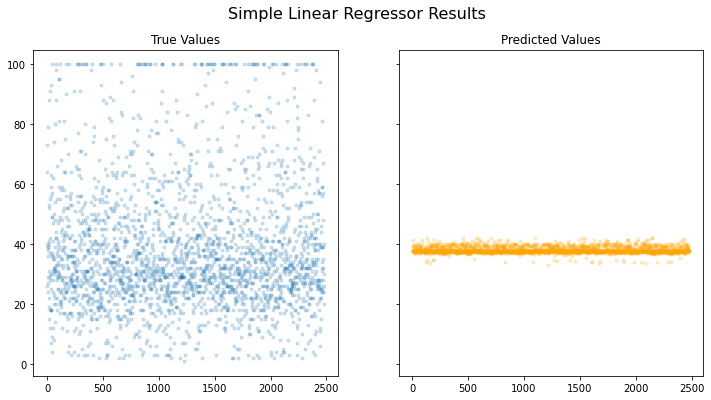

In [34]:
fit_score_plot(lin_reg, 'Simple Linear Regressor', X_train, X_test, y_train, y_test)

Great, we have established our baseline. We may now move into optimizing this baseline so that we may test it against other models. 

In [35]:
lin_reg_pipe = Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True,
                                                           include_bias=False)),
                               ('scaler', None),
                               ('lin_reg', LinearRegression(n_jobs=-1))])

lin_reg_grid = {
    
    'poly__degree':[1,2,3],
    'poly__include_bias':[True, False],
    'scaler':[None, StandardScaler()],
    'lin_reg__fit_intercept':[True, False]
    
}

lin_reg_gs = GridSearchCV(estimator=lin_reg_pipe,
                          param_grid=lin_reg_grid,
                          cv=5,
                          scoring='neg_root_mean_squared_error')

In [36]:
lin_reg_gs.fit(X_train, y_train)
lin_reg_best = lin_reg_gs.best_estimator_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False,
                                                           interaction_only=True)),
                                       ('scaler', None),
                                       ('lin_reg',
                                        LinearRegression(n_jobs=-1))]),
             param_grid={'lin_reg__fit_intercept': [True, False],
                         'poly__degree': [1, 2, 3],
                         'poly__include_bias': [True, False],
                         'scaler': [None, StandardScaler()]},
             scoring='neg_root_mean_squared_error')

In [39]:
lin_reg_gs.best_params_

{'lin_reg__fit_intercept': True,
 'poly__degree': 1,
 'poly__include_bias': True,
 'scaler': None}

RMSE Train: 20.4
RMSE Test: 21.07


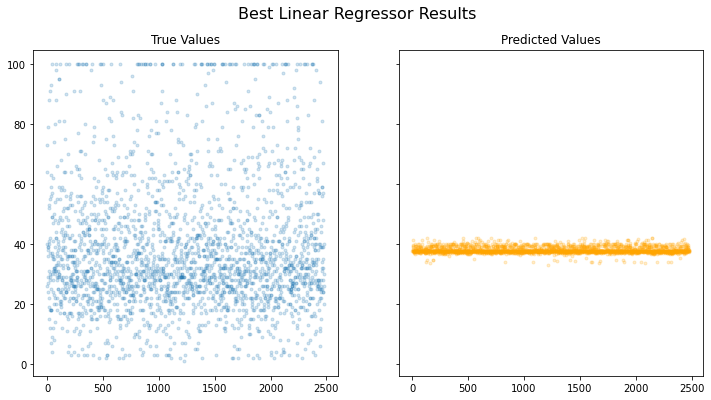

In [38]:
fit_score_plot(lin_reg_best, 'Best Linear Regressor', X_train, X_test, y_train, y_test)

It looks as though there is nothing to improve upon for the simple linear regressor. We will now progress on to more complex regression models, investigating whether we can improve on our original model. 

### SGD Regression

In [40]:
from sklearn.linear_model import SGDRegressor

In [41]:
sgd_pipe = Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                           ('ss', StandardScaler()),
                           ('model', SGDRegressor(random_state=42))])

sgd_grid = {
    
    'poly__degree':[1,2,3],
    'poly__include_bias':[True, False],
    'ss':[None, StandardScaler()],
    'model__penalty':['l1','l2'],
    'model__alpha':[.0001, .01, 1]
    
}

sgd_gs = GridSearchCV(estimator=sgd_pipe,
                          param_grid=sgd_grid,
                          cv=5,
                          scoring='neg_root_mean_squared_error')

In [42]:
sgd_gs.fit(X_train, y_train)
sgd_best = sgd_gs.best_estimator_

In [44]:
sgd_gs.best_params_

{'model__alpha': 0.01,
 'model__penalty': 'l1',
 'poly__degree': 1,
 'poly__include_bias': True,
 'ss': None}

RMSE Train: 20.4
RMSE Test: 21.07


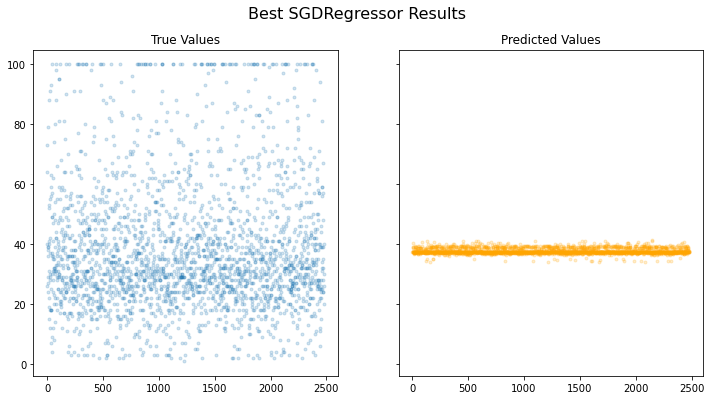

In [45]:
fit_score_plot(sgd_best, 'Best SGDRegressor', X_train, X_test, y_train, y_test)

No better than our plain-jane linear regressor. 

### kNN Regressor

In [62]:
# import kNN and build baseline knn
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_jobs=-1)

RMSE Train: 21.18
RMSE Test: 22.07


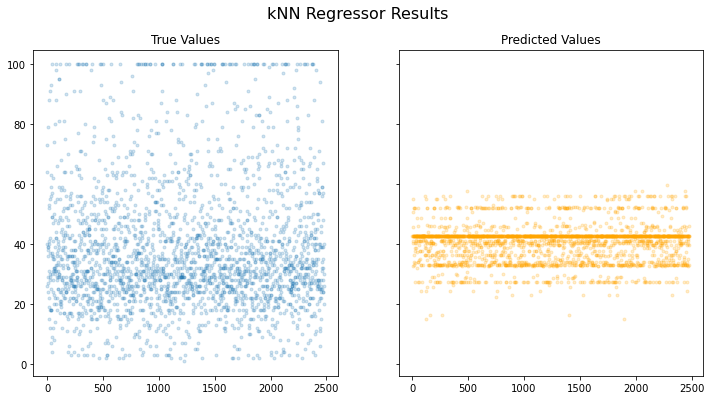

In [70]:
# investigate baselinee KNN
fit_score_plot(knn_reg, 'kNN Regressor', X_train, X_test, y_train, y_test)

In [72]:
# build kNN pipe
knn_pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(interaction_only=True)),
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor(n_jobs=-1))])

# build kNN param grid
knn_grid = {
    
    'poly__degree':[1,2],
    'poly__include_bias':[True, False],
    'ss':[None, StandardScaler()],
    'knn__n_neighbors':[1,3,9,13,21],
    'knn__p':[1,2]
    
}

# build gridsearch object
knn_gs = GridSearchCV(estimator=knn_pipe,
                     param_grid=knn_grid,
                     cv=5,
                     scoring='neg_mean_squared_error')

In [74]:
# fit and store 
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_

In [75]:
# look at best kNN parameters
knn_gs.best_params_

{'knn__n_neighbors': 21,
 'knn__p': 2,
 'poly__degree': 1,
 'poly__include_bias': True,
 'ss': StandardScaler()}

RMSE Train: 20.46
RMSE Test: 21.27


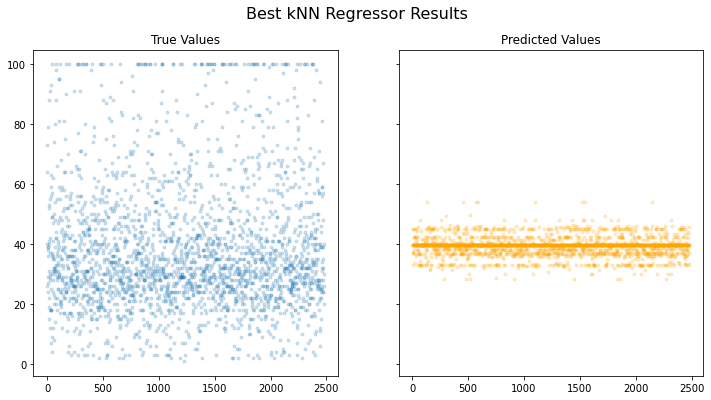

In [76]:
# investigate best KNN
fit_score_plot(knn_best, 'Best kNN Regressor', X_train, X_test, y_train, y_test)

It does not appear as though kNN is very promising for the task of simple regression here. 

### Random Forest Regressor

In [46]:
# import and create random forest regression baseline
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)

RMSE Train: 20.07
RMSE Test: 21.33


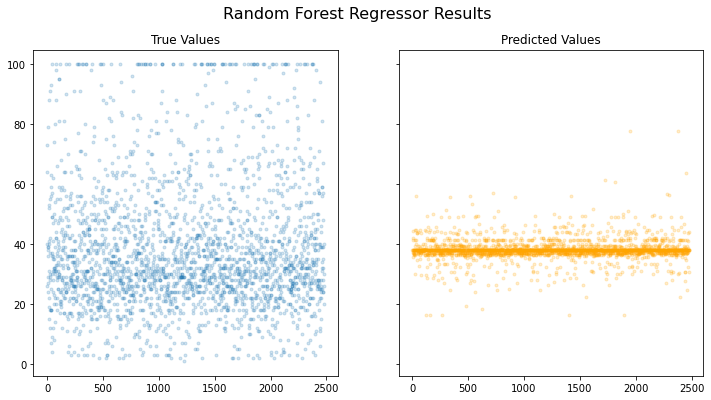

In [47]:
# fit and score baseline random forest regressor
fit_score_plot(rf_reg, 'Random Forest Regressor', X_train, X_test, y_train, y_test)

Worse than our baseline, but we might be able to improve upon our model with some tuning of hyperparameters. 

In [65]:
# create RF pipe
rf_reg_pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(interaction_only=True)),
    ('ss', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))])

# create param grid
rf_reg_grid = {
    
    'poly__degree':[1,2,3],
    'poly__include_bias':[True],
    'rf__max_depth':[2,6],
    'rf__min_samples_leaf':[6,10],
    'rf__max_samples':[.1]
    
}

# create GS object
rf_reg_gs = GridSearchCV(estimator=rf_reg_pipe,
                     param_grid=rf_reg_grid,
                     cv=5,
                     scoring='neg_mean_squared_error')

In [66]:
# fit gridseach and get store estimator
rf_reg_gs.fit(X_train, y_train)
rf_reg_best = rf_reg_gs.best_estimator_

In [67]:
# look at best params
rf_reg_gs.best_params_

{'poly__degree': 2,
 'poly__include_bias': True,
 'rf__max_depth': 2,
 'rf__max_samples': 0.1,
 'rf__min_samples_leaf': 10}

RMSE Train: 20.4
RMSE Test: 21.08


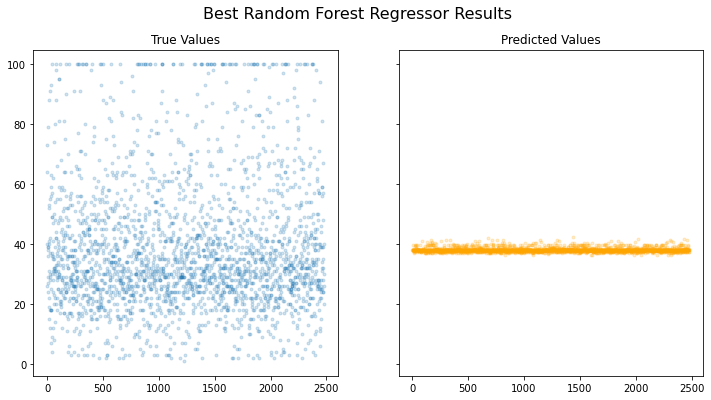

In [68]:
# plot predictions
fit_score_plot(rf_reg_best, 'Best Random Forest Regressor', X_train, X_test, y_train, y_test)

Improved by .01 RMSE point compared to our baseline. It's progress! However, the difference in results from the baseline Random Forest and the tuned Random Forest indicates that we have not made any progress with respect to making more informed guessed per instance. In other words, deviation away from the mean has so far been punished, which shows that we are not making more intelligent guesses. Because simple regression models seem to be unpromising, we will move on to classification models at this time. If after exploring other models, regression seems the most promising still, then we may make some adjustments such as: pre- and post-scaling on our target; ensembling various models; re-examining feature importance, for the craft of more intelligent models. 

## Classification Modeling with Metadata

In [78]:
# import necessary modules and functions
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [109]:
# function for quickly evaluating severa; simple classification models
def build_eval_clf(classifiers, data_dict, target_col_name='Pawpularity', 
                   y_train_reg=y_train, y_test_reg=y_test):
    
    for name in data_dict.keys():
        
        df = data_dict[name].copy()
        
        
        X = df.drop(['Id', target_col_name], axis=1)
        y = df[target_col_name]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    
        f, axes = plt.subplots(1, len(classifiers), figsize=(20, 5), sharey='row')
        
        rmse_train = {}
        rmse_test = {}
        
        for i, (key, classifier) in enumerate(classifiers.items()):
            y_pred_train = classifier.fit(X_train, y_train).predict(X_train)
            y_pred_test = classifier.predict(X_test)
            cf_matrix = confusion_matrix(y_test, y_pred_test)
            disp = ConfusionMatrixDisplay(cf_matrix, 
                                          display_labels=y_train.value_counts().sort_index().index)
            disp.plot(ax=axes[i], xticks_rotation=45)
            disp.ax_.set_title(key)
            disp.im_.colorbar.remove()
            disp.ax_.set_xlabel('')
            if i!=0:
                disp.ax_.set_ylabel('')
            
            rmse_train[key] = mean_squared_error(y_train_reg, y_pred_train, squared=False)
            rmse_test[key] = mean_squared_error(y_test_reg, y_pred_test, squared=False)
        
        
        f.text(0.4, 0.1, 'Predicted label', ha='left')
        plt.subplots_adjust(wspace=0.40, hspace=0.1)


        f.colorbar(disp.im_, ax=axes)
        plt.show()
        
        for key in rmse_train.keys():
            print(key + ' train RMSE: ' + str(round(rmse_train[key], 2)))
            print(key + ' test RMSE: ' + str(round(rmse_test[key], 2)))
            print()

In [120]:
# classifiers to evaluate
classifiers = {
    
    "Naive Bayes": GaussianNB(),
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
    
}

# DataFrames to evaluate
clf_df_dict = {
    
    'clf2':df_2class,
    'clf3':df_3class,
    'clf4':df_4class,
    'clf5':df_5class,
    
}

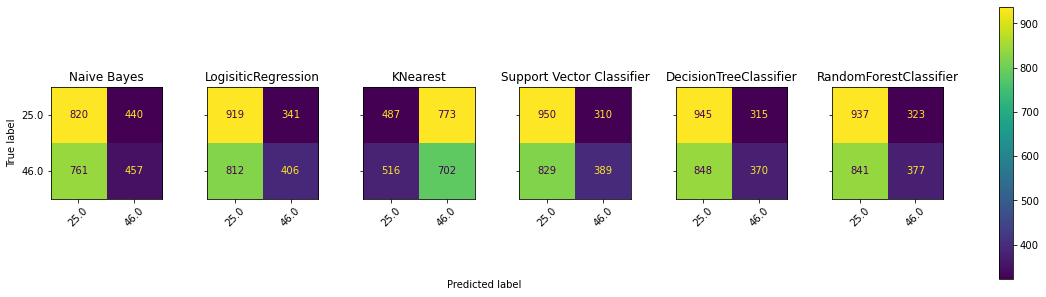

Naive Bayes train RMSE: 23.43
Naive Bayes test RMSE: 23.89

LogisiticRegression train RMSE: 23.61
LogisiticRegression test RMSE: 24.08

KNearest train RMSE: 22.88
KNearest test RMSE: 23.31

Support Vector Classifier train RMSE: 23.56
Support Vector Classifier test RMSE: 24.16

DecisionTreeClassifier train RMSE: 23.47
DecisionTreeClassifier test RMSE: 24.2

RandomForestClassifier train RMSE: 23.49
RandomForestClassifier test RMSE: 24.16



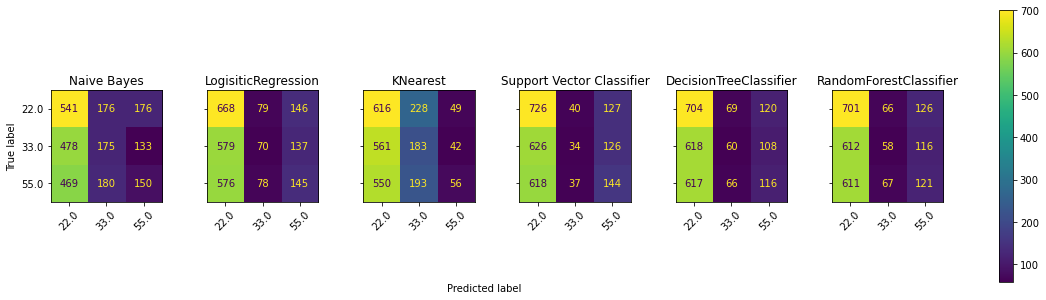

Naive Bayes train RMSE: 25.01
Naive Bayes test RMSE: 25.96

LogisiticRegression train RMSE: 25.47
LogisiticRegression test RMSE: 26.39

KNearest train RMSE: 24.75
KNearest test RMSE: 25.49

Support Vector Classifier train RMSE: 25.87
Support Vector Classifier test RMSE: 26.52

DecisionTreeClassifier train RMSE: 25.67
DecisionTreeClassifier test RMSE: 26.28

RandomForestClassifier train RMSE: 25.7
RandomForestClassifier test RMSE: 26.34



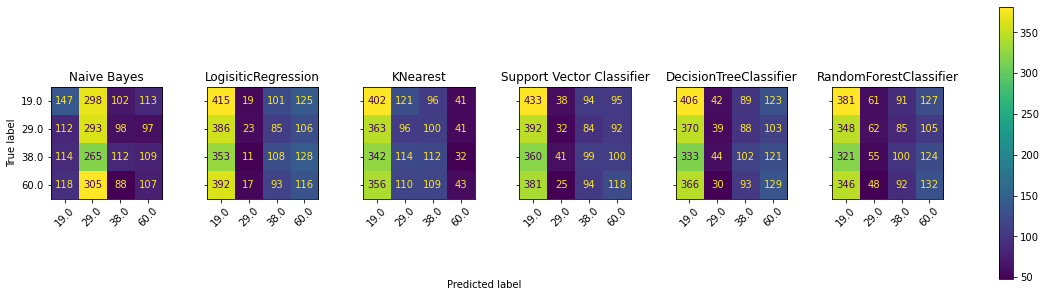

Naive Bayes train RMSE: 24.66
Naive Bayes test RMSE: 25.5

LogisiticRegression train RMSE: 27.13
LogisiticRegression test RMSE: 27.92

KNearest train RMSE: 25.89
KNearest test RMSE: 26.59

Support Vector Classifier train RMSE: 26.92
Support Vector Classifier test RMSE: 27.53

DecisionTreeClassifier train RMSE: 27.02
DecisionTreeClassifier test RMSE: 27.79

RandomForestClassifier train RMSE: 26.9
RandomForestClassifier test RMSE: 27.6



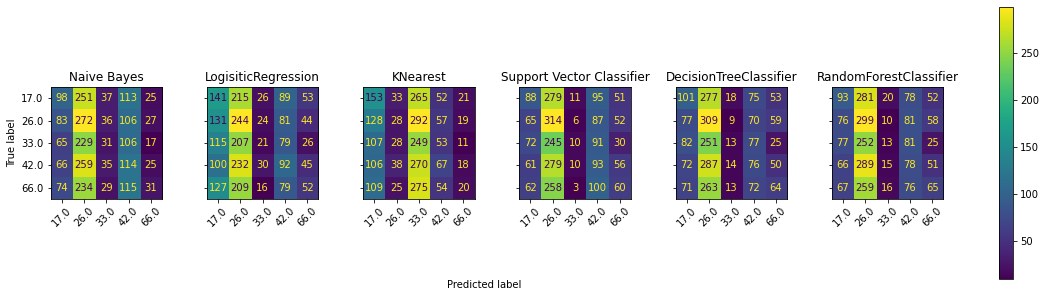

Naive Bayes train RMSE: 24.45
Naive Bayes test RMSE: 24.78

LogisiticRegression train RMSE: 25.82
LogisiticRegression test RMSE: 25.9

KNearest train RMSE: 24.05
KNearest test RMSE: 24.65

Support Vector Classifier train RMSE: 25.31
Support Vector Classifier test RMSE: 25.62

DecisionTreeClassifier train RMSE: 25.51
DecisionTreeClassifier test RMSE: 25.95

RandomForestClassifier train RMSE: 25.44
RandomForestClassifier test RMSE: 25.82



In [119]:
# examine model performance
build_eval_clf(classifiers=classifiers, data_dict=clf_df_dict)

Apparently, classifiers also do not appear to be a very promising approach if modeling with only the image metadata. Additionally, we can see that performance declines with more classes, and baselines are not as reliable as the regression baselines. We will interpret this as an indication that this approach will not prove valuable without some introduction of new data, but can return to it later if we do not find a more auspicious model. It should be noted that our choice to abandon the classfication appraoch comes early, as we have not tuned any hyperparameters; but we are willing to make this sacrifice in the interest of time. 

## Regression Modeling with ANNs

In [19]:
# import necessary libraries
import autokeras as ak

In [20]:
# train test split
X_img_train, X_img_test, y_img_train, y_img_test = train_test_split(X_img, df['Pawpularity'], random_state=42)

In [24]:
reg = ak.ImageRegressor(overwrite=True, max_trials=1, tuner='greedy')

In [25]:
# make model
history = reg.fit(X_img_train, 
                  y_img_train, 
                  epochs=5,
                  batch_size=32,
                  validation_split=.2)

Trial 1 Complete [00h 58m 34s]
val_loss: 429.6751403808594

Best val_loss So Far: 429.6751403808594
Total elapsed time: 00h 58m 34s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
233/233 [==============================] - 801s 3s/step - loss: 928.6916 - mean_squared_error: 928.6916
Epoch 2/5
233/233 [==============================] - 784s 3s/step - loss: 421.4717 - mean_squared_error: 421.4717
Epoch 3/5
233/233 [==============================] - 793s 3s/step - loss: 407.9111 - mean_squared_error: 407.9111
Epoch 4/5
233/233 [==============================] - 784s 3s/step - loss: 400.1122 - mean_squared_error: 400.1122
Epoch 5/5
233/233 [==============================] - 805s 3s/step - loss: 390.1376 - mean_squared_error: 390.1376
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets wri

<AxesSubplot:>

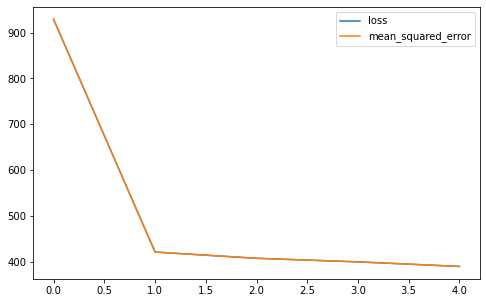

In [44]:
# plot loss
pd.DataFrame(history.history).plot(figsize=(8,5))

In [43]:
# score model on test data
y_img_preds = reg.predict(X_img_test)
mean_squared_error(y_img_test, y_img_preds, squared=False)

22.347233617874725

## Conclusion

## Future Research

## Index